In [ ]:
using Plots, LaTeXStrings
using Plots.PlotMeasures
empty!(ARGS)
#push!(ARGS, "G:/Hamburg/b20.0_mu1.0/lDGAConfig.toml")
push!(ARGS, "/home/julisn/Hamburg/ED_data/cuprate_test/b20.0_mu1.0/lDGAConfig.toml")# "G:/tmp_ED_data/U2.0_b20.0_mu1.0.toml")
include(joinpath(@__DIR__,"../examples/example00_lDGA.jl"))

using LaTeXStrings

  Activating project at `~/Codes/LadderDGA.jl`
[ Info: Precompiling LadderDGA [78e40beb-bf89-4c0e-9d2b-bee278912f2b] (cache misses: include_dependency fsize change (2))


[ Info: Reading Inputs...


In [ ]:
Fm = F_from_χ(lDGAhelper.χDMFT_m, lDGAhelper.gImp[1, :], sP, mP.β)
Fd = F_from_χ(lDGAhelper.χDMFT_d, lDGAhelper.gImp[1, :], sP, mP.β);
ΣLoc_m, ΣLoc_d = calc_local_EoM(Fm, Fd, lDGAhelper.gImp[1, :], mP, sP)
p1 = plot(imag(0.5 .* (ΣLoc_m .+ ΣLoc_d)),markershape=:auto, xlabel=L"\nu_n", label=L"\mathrm{Im}[\Sigma]")
plot!(imag(lDGAhelper.Σ_loc[axes(ΣLoc_m,1)]), label=L"\mathrm{Im}[\Sigma_\mathrm{Impurity}]")
p2 = plot(real(0.5 .* (ΣLoc_m .+ ΣLoc_d)),markershape=:auto, xlabel=L"\nu_n", label=L"\mathrm{Re}[\Sigma]")
plot!(real(lDGAhelper.Σ_loc[axes(ΣLoc_m,1)]), label=L"\mathrm{Re}[\Sigma_\mathrm{Impurity}]")
p3 = plot(abs.(0.5 .* (ΣLoc_m .+ ΣLoc_d) .- lDGAhelper.Σ_loc[axes(ΣLoc_m,1)]),markershape=:auto, xlabel=L"\nu_n", label=L"\mathrm{abs}()")
plot(p1, p2, p3)

In [44]:
using OffsetArrays
function calc_local_EoM(Fm, Fd, gImp::OffsetVector, mP::ModelParameters, sP::SimulationParameters)
    νmax = floor(Int, size(Fm,1)/2)
    ωGrid = -sP.n_iω:sP.n_iω
    ΣLoc_m = OffsetVector(zeros(ComplexF64, νmax), 0:νmax-1) 
    ΣLoc_d = OffsetVector(zeros(ComplexF64, νmax), 0:νmax-1)
    for (ωi,ωm) in enumerate(ωGrid)
        νnGrid = LadderDGA.νnGrid_noShell(ωm, sP)
        for (νi,νn) in enumerate(νnGrid)
            for (νpi,νpn) in enumerate(νnGrid)
                if νn >= 0 && νn < νmax   
                    ΣLoc_m[νn] += gImp[νpn] * gImp[νpn + ωm] * gImp[νn + ωm] * Fm[νi,νpi,ωi]
                    ΣLoc_d[νn] -= gImp[νpn] * gImp[νpn + ωm] * gImp[νn + ωm] * Fd[νi,νpi,ωi]
                end
            end
        end
    end
    return mP.U .* ΣLoc_m/mP.β^2 .+ mP.U*mP.n/2, mP.U .* ΣLoc_d/mP.β^2 .+ mP.U*mP.n/2
end

calc_local_EoM (generic function with 1 method)

(ComplexF64[1.0923401860398059 - 0.5588856569983647im, 1.039844320073195 - 0.7148378189456228im, 1.0145388001009696 - 0.6644299780920423im, 1.0049975124089814 - 0.5835785691680865im, 1.0007734655740568 - 0.5116570510927038im, 0.9987453441823264 - 0.45219574353452374im, 0.9977605699219275 - 0.4033669193693596im, 0.997299520445053 - 0.36299584507965166im, 0.9971063027807006 - 0.32928547229203753im, 0.9970502334382263 - 0.30084308506408675im  …  0.9980553635347257 - 0.01238996989750748im, 0.998056272417552 - 0.011955190024706939im, 0.9980572959901782 - 0.011507430989584892im, 0.998058369247701 - 0.011045678389430826im, 0.9980592586085846 - 0.010568961592114482im, 0.998059393468175 - 0.010074758581667571im, 0.9980573670904714 - 0.009556111706181198im, 0.9980498507953003 - 0.008988081729598408im, 0.9980282515852645 - 0.008271071431410856im, 0.9979644547405077 - 0.006841223985340044im], ComplexF64[1.0923472634932114 - 0.5589280465047015im, 1.0398480415309517 - 0.7148920205275684im, 1.0145409

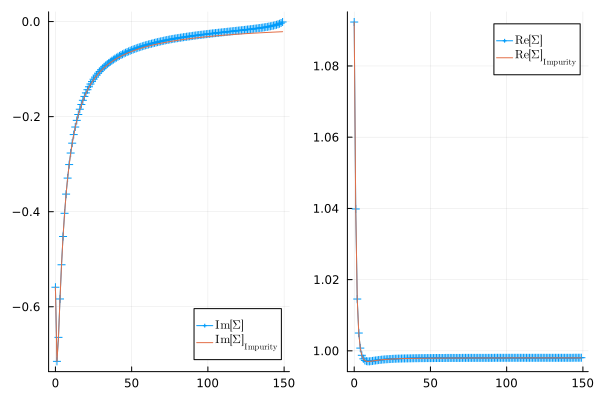

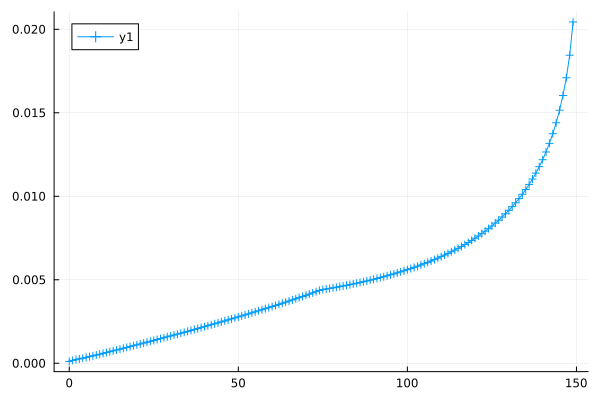

In [51]:
abs.(0.5 .* (ΣLoc_m .+ ΣLoc_d) .- lDGAhelper.Σ_loc[axes(ΣLoc_m,1)])

150-element OffsetArray(::Vector{Float64}, 0:149) with eltype Float64 with indices 0:149:
 0.00010951367183996202
 0.0001731447591607622
 0.00021719701197195706
 0.00025955311249362286
 0.00030348563526601854
 0.00034910986962143704
 0.00039597878660615414
 0.000443883632075331
 0.000492504676728655
 0.0005417723819894485
 0.0005914783323181887
 0.0006416283264715694
 0.0006920710060876727
 ⋮
 0.011386340946784486
 0.011770696792407363
 0.012191285805543501
 0.012654817109347
 0.013169516178196793
 0.013746563357667612
 0.014400646286314017
 0.015152813976762183
 0.016034069752363697
 0.017096305187062604
 0.01844495820654554
 0.02043623686604234

In [52]:
mP = lDGAhelper.mP
kG = lDGAhelper.kG
U = mP.U
nden = mP.n
beta = mP.β
lim_se = U^2 * (nden/2) * (1 - nden/2)
xr = collect(axes(se_ntc,2))
iν_arr = LadderDGA.iν_array(beta, xr)
gimp = lDGAhelper.gImp[1,xr];

100-element Vector{ComplexF64}:
   -0.02487871607043655 - 1.0388282364502879im
   -0.00401917937631525 - 0.7292472271554354im
  0.0024909234425491904 - 0.6220838522210802im
  0.0033510662536685634 - 0.5481171016652622im
  0.0028738263022781542 - 0.4871794914349728im
   0.002208181619415979 - 0.4357792035502946im
  0.0016413240360366257 - 0.3923117294208309im
   0.001214823153299432 - 0.3554680257720634im
  0.0009067804702407137 - 0.3241072834458678im
   0.000686415551835189 - 0.29726230012759564im
  0.0005280777921578721 - 0.27413426352373627im
 0.00041305784704641406 - 0.254073697214275im
 0.00032833940070901786 - 0.23655640346809254im
                        ⋮
  2.6635122594321144e-6 - 0.035908786367429286im
  2.6017732101341025e-6 - 0.035508850919280695im
  2.5421788037795586e-6 - 0.03511771225875241im
  2.4846300116011253e-6 - 0.03473508374515099im
   2.429033491764136e-6 - 0.03436069103901956im
  2.3753012001385713e-6 - 0.03399427145021648im
   2.323350031887181e-6 - 0.03363557332

In [13]:
    rhs,PP_p1 = LadderDGA.LambdaCorrection.λm_rhs(χm, χd, lDGAhelper)
    λm  = LadderDGA.LambdaCorrection.λm_correction_val(χm, rhs, lDGAhelper)

0.1085195762069485

In [14]:
    rhs,PP_p1 = LadderDGA.LambdaCorrection.λm_rhs(χm, χd, lDGAhelper)
    λm2  = LadderDGA.LambdaCorrection.λm_correction_val2(χm, rhs, lDGAhelper)

1.0356518214836463

In [17]:
se =  calc_Σ(χm, γm, χd, γd, λ₀, lDGAhelper; λm = λm, λd = 0.0, tc = ΣTail_Full)
se_ntc = calc_Σ(χm, γm, χd, γd, λ₀, lDGAhelper; λm = λm, λd = 0.0, tc = ΣTail_Plain);
se2 =  calc_Σ(χm, γm, χd, γd, λ₀, lDGAhelper; λm = λm2, λd = 0.0, tc = ΣTail_Full)
se_ntc2 = calc_Σ(χm, γm, χd, γd, λ₀, lDGAhelper; λm = λm2, λd = 0.0, tc = ΣTail_Plain);

In [23]:
se_parts =  calc_Σ_parts(χm, γm, χd, γd, λ₀, lDGAhelper; λm = λm)
se_parts2 =  calc_Σ_parts(χm, γm, χd, γd, λ₀, lDGAhelper; λm = λm2);

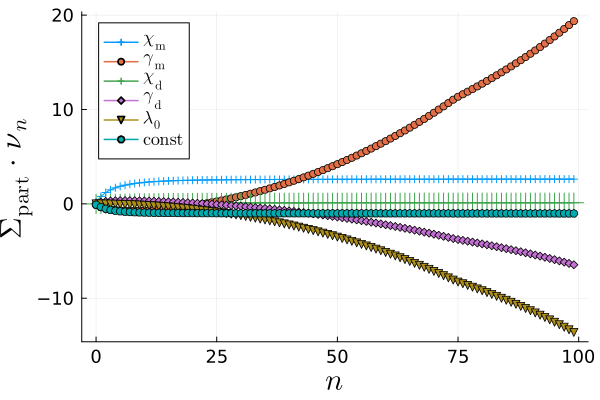

In [49]:
plot(xr, real(se_parts[1,0:99,1] .* iν_arr),markershape=:auto, legend=:topleft, label = L"\chi_\mathrm{m}", xlabel=L"n", ylabel= L"\Sigma_\mathrm{part} \cdot \nu_n",xtickfontsize=12,ytickfontsize=12,xguidefontsize=20,yguidefontsize=20,legendfontsize=12)
plot!(xr, real((se_parts[1,0:99,2]) .* iν_arr), markershape=:auto, label = L"\gamma_\mathrm{m}");
plot!(xr, real(se_parts[1,0:99,3] .* iν_arr), markershape=:auto, label = L"\chi_\mathrm{d}", markersize=10);
plot!(xr, real(se_parts[1,0:99,4] .* iν_arr), markershape=:auto, label = L"\gamma_\mathrm{d}");
plot!(xr, real(se_parts[1,0:99,5] .* iν_arr), markershape=:auto, label = L"\lambda_0");
plot!(xr, real((se_parts[1,0:99,6] .- U*1.0/2) .* iν_arr), markershape=:auto, label = L"\mathrm{const}")

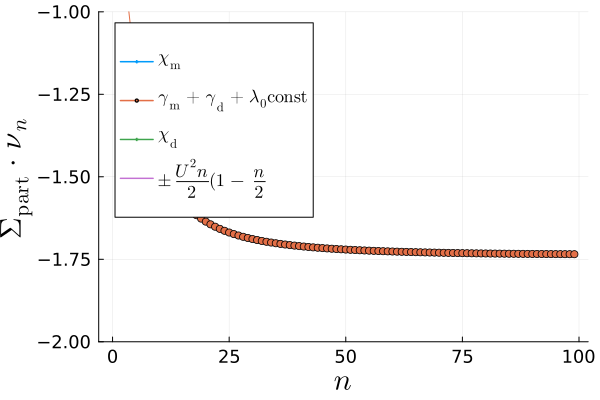

In [57]:
plot(xr, real(se_parts[1,0:99,1] .* iν_arr),ylims=(-2,-1),markershape=:auto, legend=:topleft, label = L"\chi_\mathrm{m}", xlabel=L"n", ylabel= L"\Sigma_\mathrm{part} \cdot \nu_n",xtickfontsize=12,ytickfontsize=12,xguidefontsize=20,yguidefontsize=20,legendfontsize=12)
plot!(xr, real((se_parts[1,0:99,2] .+ se_parts[1,0:99,4]  .+ se_parts[1,0:99,5] .+ se_parts[1,0:99,6]) .* iν_arr), markershape=:auto, label = L"\gamma_\mathrm{m} + \gamma_\mathrm{d} + \lambda_0 \mathrm{const}");
plot!(xr, real(se_parts[1,0:99,3] .* iν_arr), markershape=:auto, label = L"\chi_\mathrm{d}")
hline!([-lim_se, lim_se], label=L"\pm \frac{U^2n}{2}(1-\frac{n}{2}")

In [62]:
U * nden/2 * (1-nden/2)

0.49999806477118813

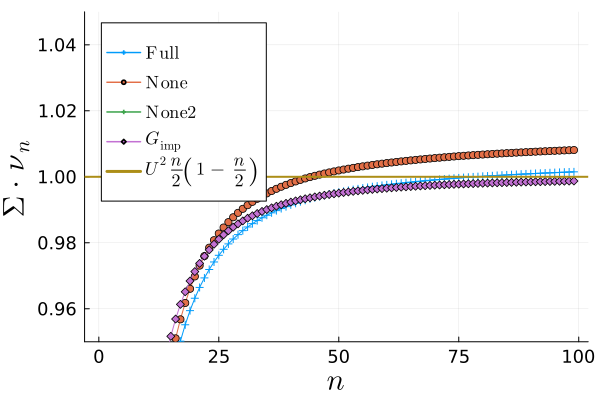

In [16]:
mP = lDGAhelper.mP
kG = lDGAhelper.kG
U = mP.U
nden = mP.n
beta = mP.β
lim_se = U^2 * (nden/2) * (1 - nden/2)
xr = collect(axes(se_ntc,2))
iν_arr = LadderDGA.iν_array(beta, xr)
gimp = lDGAhelper.gImp[1,xr]

plot(xr, real(se[1,:].parent .* iν_arr), ylims=(0.95,1.05), markershape=:auto, legend=:topleft, label = L"\mathrm{Full}", xlabel=L"n", ylabel= L"\Sigma \cdot \nu_n",xtickfontsize=12,ytickfontsize=12,xguidefontsize=20,yguidefontsize=20,legendfontsize=12)
plot!(xr, real(se_ntc[1,:].parent .* iν_arr), markershape=:auto, label = L"\mathrm{None}");
plot!(xr, real(se_ntc2[1,:].parent .* iν_arr), markershape=:auto, label = L"\mathrm{None2}");
plot!(xr, real(gimp .* iν_arr), markershape=:auto, label = L"G_\mathrm{imp}")
hline!([lim_se], linewidth=2, label=L"U^2 \frac{n}{2} \left(1 - \frac{n}{2} \right)")


In [2]:
res_m_ntc  = λm_correction(χm, γm, χd, γd, λ₀, lDGAhelper, tc=ΣTail_Plain)

╭──── λ-correction (type: LadderDGA.LambdaCorrection.mCorrection),... ─────────╮
│  λm = 0.10729388, λd = 0.00000000, μ = 0.96760445, n = 0.99761478            │
│  PP_1   =  0.24999903,  PP_2   =  0.24999903,  Δ = 0.0000%                   │
│  Epot_1 =  0.10254146,  Epot_2 =  0.12354335,  Δ = 9.2894%                   │
│  Ekin_1 = -0.22263679,  Ekin_2 = -0.20903607,  Δ = 3.1507%                   │
│  χ_m = 0.43724465,  χ_m_loc = 0.43558908,  Δ = 0.1897%                       │
│                                                                              │
╰──────────────────────────────────────────────────────────────────────────────╯


In [4]:
res_dm_f     = λdm_correction(χm, γm, χd, γd, λ₀, lDGAhelper)


╭──── λ-correction (type: LadderDGA.LambdaCorrection.dmCorrection),... ────────╮
│  λm = 0.10520695, λd = 9.01112644, μ = 0.97170370, n = 0.99767113            │
│  PP_1   =  0.24999903,  PP_2   =  0.24999903,  Δ = 0.0000%                   │
│  Epot_1 =  0.09199227,  Epot_2 =  0.09199227,  Δ = 0.0000%                   │
│  Ekin_1 = -0.21484687,  Ekin_2 = -0.20903607,  Δ = 1.3708%                   │
│  χ_m = 0.45302019,  χ_m_loc = 0.43558908,  Δ = 1.9616%                       │
│                                                                              │
╰──────────────────────────────────────────────────────────────────────────────╯


In [ ]:
res_m_f      = λm_correction(χm, γm, χd, γd, λ₀, lDGAhelper, tc=ΣTail_Full)
res_m_s      = λm_correction(χm, γm, χd, γd, λ₀, lDGAhelper, tc=ΣTail_ExpStep{LadderDGA.default_ΣTail_ExpStep_δ})
res_dm_ntc = λdm_correction(χm, γm, χd, γd, λ₀, lDGAhelper, tc=ΣTail_Plain)
res_dm_f     = λdm_correction(χm, γm, χd, γd, λ₀, lDGAhelper, tc=ΣTail_Full)
res_dm_s     = λdm_correction(χm, γm, χd, γd, λ₀, lDGAhelper, tc=ΣTail_ExpStep{LadderDGA.default_ΣTail_ExpStep_δ})

In [108]:

function Cond_Causal(χm::χT,γm::γT,χd::χT, γd::γT,λ₀, h; 
    λm::Float64 = NaN, λd::Float64 = NaN, 
    νmax::Int = LadderDGA.eom_ν_cutoff(h), fix_n::Bool = true, tc::Type{<: ΣTail} = LadderDGA.default_Σ_tail_correction(),
    validation_threshold::Float64 = 1e-8, max_steps_m::Int = 2000,
    max_steps_dm::Int = 2000, log_io = devnull
)
    μ_new, G_ladder, Σ_ladder = calc_G_Σ(χm, γm, χd, γd, λ₀, λm, λd, h; νmax=νmax, tc = tc, fix_n = fix_n)
    ef = estimate_ef(Σ_ladder, h.kG, μ_new, h.mP.β)
    SC_2 = any(ef) ? maximum(imag.(Σ_ladder[ef,0])) : NaN
    return maximum(imag.(Σ_ladder[:,0])), SC_2
end

Cond_Causal (generic function with 1 method)

In [109]:
PP_1, PP_2 = Cond_PauliPrinciple(χm, γm, χd, γd, λ₀, lDGAhelper; tc = ΣTail_Plain, λm = λm_i, λd = λd_i)
EP_1, EP_2 = Cond_EPot(χm, γm, χd, γd, λ₀, lDGAhelper; tc = ΣTail_Plain, λm = λm_i, λd = λd_i)
EK_1, EK_2 = Cond_EKin(χm, γm, χd, γd, λ₀, lDGAhelper; tc = ΣTail_Plain, λm = λm_i, λd = λd_i)
ST_1, ST_2 = Cond_Tail(χm, γm, χd, γd, λ₀, lDGAhelper; tc = ΣTail_Plain, λm = λm_i, λd = λd_i)
SC_1, SC_2 = Cond_Causal(χm, γm, χd, γd, λ₀, lDGAhelper; tc = ΣTail_Plain, λm = λm_i, λd = λd_i)

(-0.3913145352888118, -0.3913145352888118)

In [145]:
λm_i = 0.0
λd_i = 0.0
Δλ = 0.08
nh = LadderDGA.ω0_index(χd)
λm_r =(-minimum(1 ./ view(χm, :, nh)) + 0.0001):(Δλ/150.0):0.15
λd_r = (-minimum(1 ./ view(χd, :, nh)) + 0.005):Δλ:1.0
tt = Array{ComplexF64,3}(undef, length(λm_r), length(λd_r),12)
for (i,λd_i) in enumerate(λd_r)
    println("$i of $(length(λd_r))")
    for (j,λm_i) in enumerate(λm_r)
        PP_1, PP_2 = Cond_PauliPrinciple(χm, γm, χd, γd, λ₀, lDGAhelper; tc = ΣTail_Plain, λm = λm_i, λd = λd_i)
        EP_1, EP_2 = Cond_EPot(χm, γm, χd, γd, λ₀, lDGAhelper; tc = ΣTail_Plain, λm = λm_i, λd = λd_i)
        EK_1, EK_2 = Cond_EKin(χm, γm, χd, γd, λ₀, lDGAhelper; tc = ΣTail_Plain, λm = λm_i, λd = λd_i)
        ST_1, ST_2 = Cond_Tail(χm, γm, χd, γd, λ₀, lDGAhelper; tc = ΣTail_Plain, λm = λm_i, λd = λd_i)
        SC_1, SC_2 = Cond_Causal(χm, γm, χd, γd, λ₀, lDGAhelper; tc = ΣTail_Plain, λm = λm_i, λd = λd_i)
        tt[j,i,:] = [λm_i, λd_i, PP_1, PP_2, EP_1, EP_2, EK_1, EK_2, ST_1, ST_2, SC_1, SC_2]
    end
end


1 of 137
┌ Warning: improved (true) μ determination failed with Roots.ConvergenceFailed. Falling back to naive summation!
└ @ LadderDGA G:\Codes\LadderDGA.jl\src\GFTools.jl:289
┌ Warning: improved (true) μ determination failed with Roots.ConvergenceFailed. Falling back to naive summation!
└ @ LadderDGA G:\Codes\LadderDGA.jl\src\GFTools.jl:289
┌ Warning: improved (true) μ determination failed with Roots.ConvergenceFailed. Falling back to naive summation!
└ @ LadderDGA G:\Codes\LadderDGA.jl\src\GFTools.jl:289
2 of 137
┌ Warning: improved (true) μ determination failed with Roots.ConvergenceFailed. Falling back to naive summation!
└ @ LadderDGA G:\Codes\LadderDGA.jl\src\GFTools.jl:289
┌ Warning: improved (true) μ determination failed with Roots.ConvergenceFailed. Falling back to naive summation!
└ @ LadderDGA G:\Codes\LadderDGA.jl\src\GFTools.jl:289
┌ Warning: improved (true) μ determination failed with Roots.ConvergenceFailed. Falling back to naive summation!
└ @ LadderDGA G:\Codes\Ladder

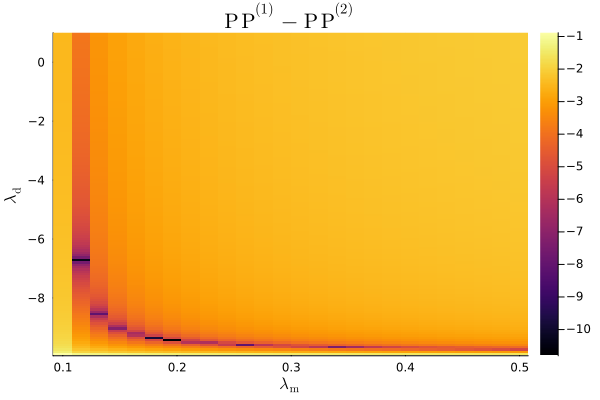

In [120]:
heatmap(λm_r, λd_r, log.(abs.(real(tt[:,:,3] .- tt[:,:,4])))', xlabel=L"\lambda_\mathrm{m}", ylabel=L"\lambda_\mathrm{d}", title=L"\mathrm{PP}^{(1)} - \mathrm{PP}^{(2)}")

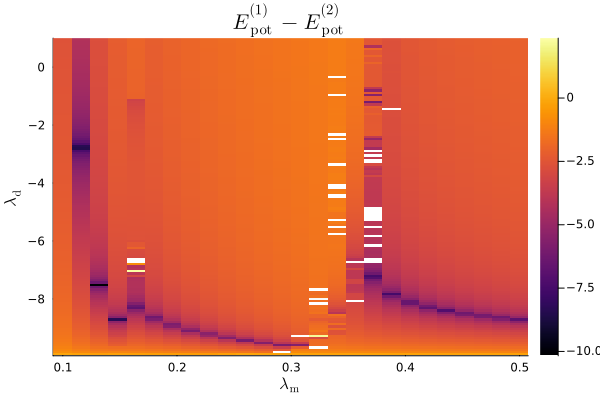

In [121]:
heatmap(λm_r, λd_r, log.(abs.(real(tt[:,:,5] .- tt[:,:,6])))', xlabel=L"\lambda_\mathrm{m}", ylabel=L"\lambda_\mathrm{d}", title=L"E_\mathrm{pot}^{(1)} - E_\mathrm{pot}^{(2)}")

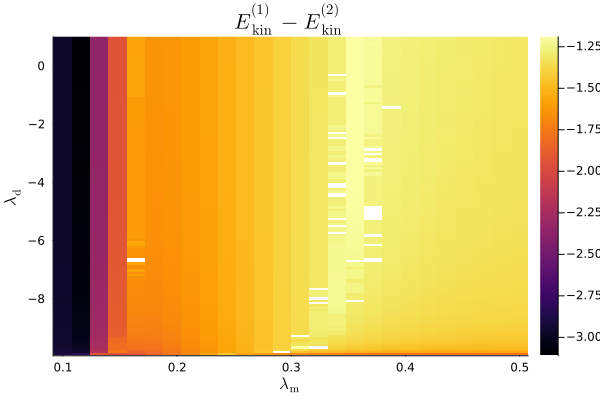

In [122]:
heatmap(λm_r, λd_r, log.(abs.(real(tt[:,:,7] .- tt[:,:,8])))', xlabel=L"\lambda_\mathrm{m}", ylabel=L"\lambda_\mathrm{d}", title=L"E_\mathrm{kin}^{(1)} - E_\mathrm{kin}^{(2)}")

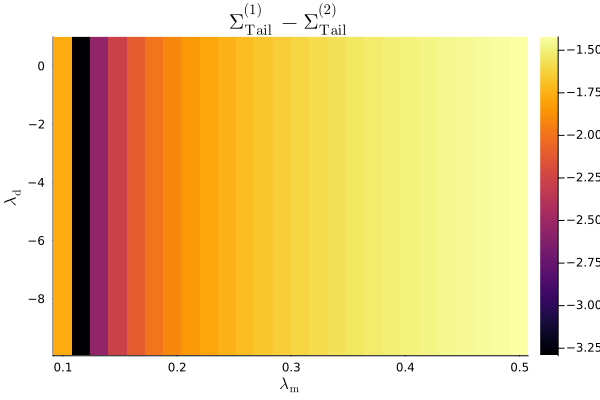

In [123]:
heatmap( λm_r, λd_r, log.(abs.(real(tt[:,:,9] .- tt[:,:,10])))', xlabel=L"\lambda_\mathrm{m}", ylabel=L"\lambda_\mathrm{d}", title=L"\Sigma_\mathrm{Tail}^{(1)} - \Sigma_\mathrm{Tail}^{(2)}")

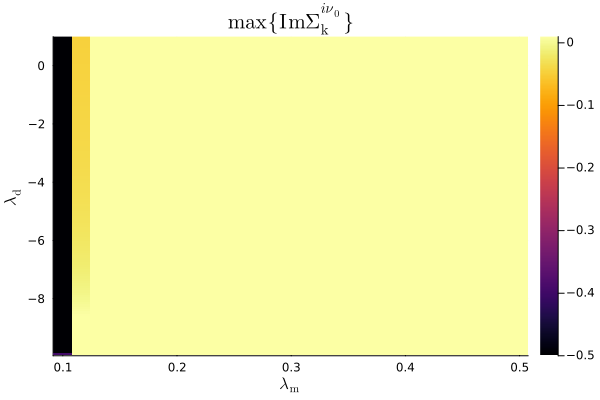

In [126]:
heatmap( λm_r, λd_r, real(tt[:,:,11])', clims=(-0.5,0.01), xlabel=L"\lambda_\mathrm{m}", ylabel=L"\lambda_\mathrm{d}", title=L"\max \{\mathrm{Im} \Sigma^{i\nu_0}_\mathrm{k}\}")

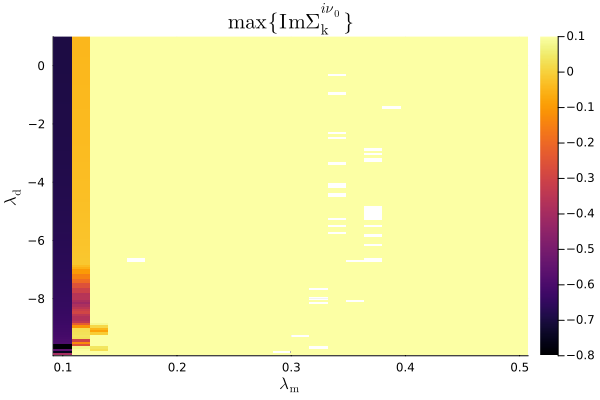

In [125]:
heatmap( λm_r, λd_r, real(tt[:,:,12])', clims=(-0.8,0.1), xlabel=L"\lambda_\mathrm{m}", ylabel=L"\lambda_\mathrm{d}", title=L"\max \{\mathrm{Im} \Sigma^{i\nu_0}_\mathrm{k}\}")

In [106]:
real(tt[1,:,12])'

1×137 adjoint(::Vector{Float64}) with eltype Float64:
 -0.0774645  -0.848676  -0.241086  …  -0.382267  -0.382401  -0.382534

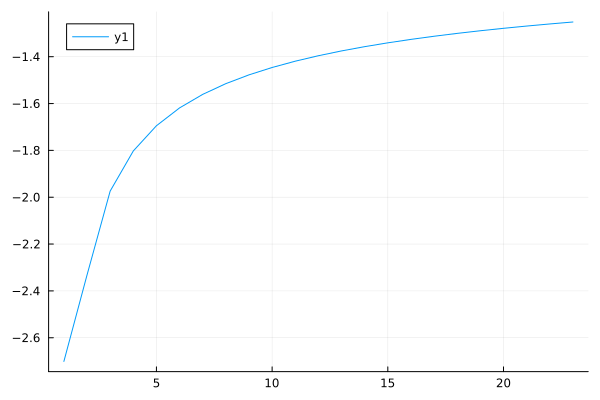

In [53]:
tttt = log.(abs.(real(tt[:,:,9] .- tt[:,:,10])))'
plot(tttt[1,:]) 

In [33]:
isfinite(0)

true

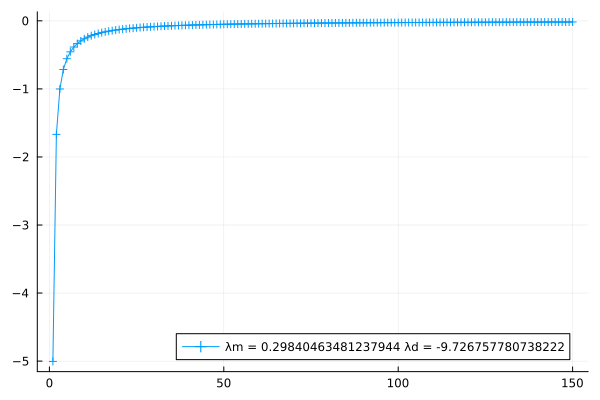

In [17]:
j_p = 1
i_p = 1
plot(imag(tt[j_p,i_p][1,:,7]), markershape=:auto, label="λm = $(λm_r[j_p]) λd = $(λd_r[i_p])")
j_p = 1
i_p = 1
plot!(imag(tt[j_p,i_p][1,:,7]), markershape=:auto, label="λm = $(λm_r[j_p]) λd = $(λd_r[i_p])")

In [15]:
res_m_ntc  = λm_correction(χm, γm, χd, γd, λ₀, lDGAhelper, tc=ΣTail_Plain)
res_m      = λm_correction(χm, γm, χd, γd, λ₀, lDGAhelper, tc=ΣTail_Full)
res_dm_ntc = λdm_correction(χm, γm, χd, γd, λ₀, lDGAhelper, tc=ΣTail_Plain)
res_dm     = λdm_correction(χm, γm, χd, γd, λ₀, lDGAhelper, tc=ΣTail_Full)

┌ Error: WARNING. SKIPPING λ correction because NaN is not finite!
└ @ LadderDGA.LambdaCorrection ~/Codes/LadderDGA.jl/src/LambdaCorrection/common.jl:43


╭──── λ-correction (type: LadderDGA.LambdaCorrection.dmCorrection),... ────────╮
│  λm = -0.31053215, λd = 11.11379919, μ = 0.76042010, n = 0.99476730          │
│  PP_1   =  0.24999903,  PP_2   =  0.24999903,  Δ = 0.0000%                   │
│  Epot_1 =  0.12940359,  Epot_2 =  0.12940359,  Δ = 0.0000%                   │
│  Ekin_1 = -0.33148967,  Ekin_2 = -0.20903607,  Δ = 22.6545%                  │
│  χ_m = 0.43431453,  χ_m_loc = 0.43559014,  Δ = 0.1466%                       │
│                                                                              │
╰──────────────────────────────────────────────────────────────────────────────╯


┌ Error: WARNING. SKIPPING λ correction because NaN is not finite!
└ @ LadderDGA.LambdaCorrection ~/Codes/LadderDGA.jl/src/LambdaCorrection/common.jl:43
┌ Error: WARNING. SKIPPING λ correction because NaN is not finite!
└ @ LadderDGA.LambdaCorrection ~/Codes/LadderDGA.jl/src/LambdaCorrection/common.jl:43


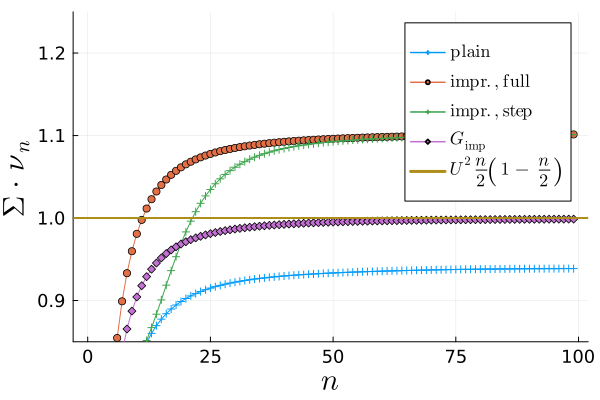

In [19]:

#se_ntc
λm_test = res_dm_ntc.λm
λd_test = res_dm_ntc.λd
Σλ_ntc = calc_Σ(χm, γm, χd, γd, λ₀, lDGAhelper; λm = λm_test, λd = λd_test, tc = ΣTail_Plain);
Σλ_tc = calc_Σ(χm, γm, χd, γd, λ₀, lDGAhelper; λm = λm_test, λd = λd_test, tc = ΣTail_Full);
tc_factor_full = LadderDGA.tail_factor(ΣTail_Full, mP.U, mP.β, mP.n, lDGAhelper.Σ_loc, iν_arr)
tc_factor_exp_1 = LadderDGA.tail_factor(ΣTail_ExpStep{0.001}, mP.U, mP.β, mP.n, lDGAhelper.Σ_loc, iν_arr)
tc_factor_exp_2 = LadderDGA.tail_factor(ΣTail_ExpStep{0.05}, mP.U, mP.β, mP.n, lDGAhelper.Σ_loc, iν_arr)
tc_factor_exp_3 = LadderDGA.tail_factor(ΣTail_ExpStep{0.1}, mP.U, mP.β, mP.n, lDGAhelper.Σ_loc, iν_arr)
tc_term_full  = LadderDGA.tail_correction_term(sum_kω(kG, χm, λ = λm_test), lDGAhelper.χloc_m_sum, tc_factor_full)
tc_term_exp_1  = LadderDGA.tail_correction_term(sum_kω(kG, χm, λ = λm_test), lDGAhelper.χloc_m_sum, tc_factor_exp_1)
tc_term_exp_2  = LadderDGA.tail_correction_term(sum_kω(kG, χm, λ = λm_test), lDGAhelper.χloc_m_sum, tc_factor_exp_2)
tc_term_exp_3  = LadderDGA.tail_correction_term(sum_kω(kG, χm, λ = λm_test), lDGAhelper.χloc_m_sum, tc_factor_exp_3)

plot(xr, real(Σλ_ntc[1,:].parent .* iν_arr), ylims=(0.85,1.25), markershape=:auto, legend=:topright, label = L"\mathrm{plain}", xlabel=L"n", ylabel= L"\Sigma \cdot \nu_n",xtickfontsize=12,ytickfontsize=12,xguidefontsize=20,yguidefontsize=20,legendfontsize=12)
#plot!(xr, real(Σλ_tc[1,:].parent .* iν_arr), markershape=:auto, label = L"\mathrm{improved}")
plot!(xr, real((Σλ_ntc[:,:].parent .+ (tc_term_full ))[1,:] .* iν_arr), markershape=:auto, label = L"\mathrm{impr., full}")
plot!(xr, real((Σλ_ntc[:,:].parent .+ (tc_term_exp_1  ))[1,:] .* iν_arr), markershape=:auto, label = L"\mathrm{impr., step}")
plot!(xr, real(gimp .* iν_arr), markershape=:auto, label = L"G_\mathrm{imp}")
hline!([lim_se], linewidth=2, label=L"U^2 \frac{n}{2} \left(1 - \frac{n}{2} \right)")
#

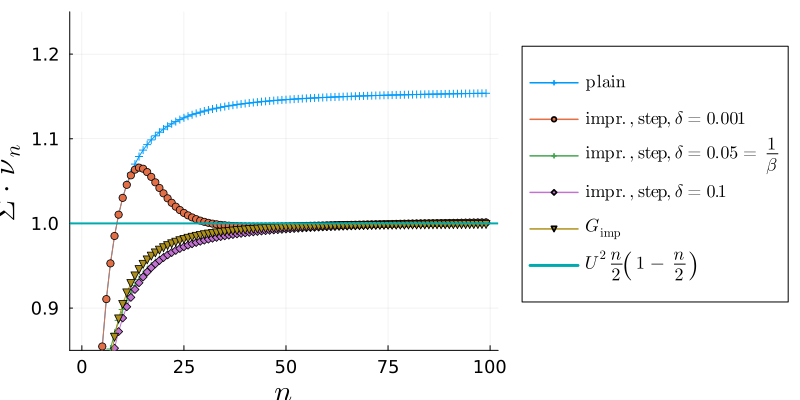

In [4]:
tc_term_exp_1  = LadderDGA.tail_correction_term(sum_kω(kG, χm, λ = λm_test), lDGAhelper.χloc_m_sum, tc_factor_exp_1)
tc_term_exp_2  = LadderDGA.tail_correction_term(sum_kω(kG, χm, λ = λm_test), lDGAhelper.χloc_m_sum, tc_factor_exp_2)
tc_term_exp_3  = LadderDGA.tail_correction_term(sum_kω(kG, χm, λ = λm_test), lDGAhelper.χloc_m_sum, tc_factor_exp_3)

plot(xr, real(Σλ_ntc[1,:].parent .* iν_arr), ylims=(0.85,1.25), size=(800,400), markershape=:auto, legend=:outerright, label = L"\mathrm{plain}", xlabel=L"n", ylabel= L"\Sigma \cdot \nu_n",xtickfontsize=12,ytickfontsize=12,xguidefontsize=20,yguidefontsize=20,legendfontsize=12)
#plot!(xr, real(Σλ_tc[1,:].parent .* iν_arr), markershape=:auto, label = L"\mathrm{improved}")
#plot!(xr, real((Σλ_ntc[:,:].parent .+ (tc_term_full ))[1,:] .* iν_arr), markershape=:auto, label = L"\mathrm{impr., full}")
plot!(xr, real((Σλ_ntc[:,:].parent .+ (tc_term_exp_1 ))[1,:] .* iν_arr), markershape=:auto, label = L"\mathrm{impr., step}, \delta=0.001")
plot!(xr, real((Σλ_ntc[:,:].parent .+ (tc_term_exp_2 ))[1,:] .* iν_arr), markershape=:auto, label = L"\mathrm{impr., step}, \delta=0.05=\frac{1}{\beta}")
plot!(xr, real((Σλ_ntc[:,:].parent .+ (tc_term_exp_3 ))[1,:] .* iν_arr), markershape=:auto, label = L"\mathrm{impr., step}, \delta=0.1")
plot!(xr, real(gimp .* iν_arr), markershape=:auto, label = L"G_\mathrm{imp}")
hline!([lim_se], linewidth=2, label=L"U^2 \frac{n}{2} \left(1 - \frac{n}{2} \right)")

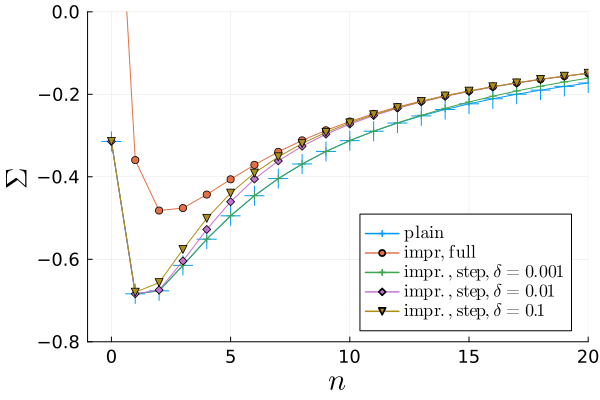

In [5]:
plot(xr, imag(Σλ_ntc[1,:].parent), xlims=(-1,20), ylims=(-0.8,0.0),markershape=:auto, markersize=10, legend=:bottomright,label = L"\mathrm{plain}", xlabel=L"n", ylabel= L"\Sigma",xtickfontsize=12,ytickfontsize=12,xguidefontsize=20,yguidefontsize=20,legendfontsize=12)
plot!(xr, imag(Σλ_tc[1,:].parent), markershape=:auto, label = L"\mathrm{impr, full}")
plot!(xr, imag((Σλ_ntc[:,:].parent .+ (tc_term_exp_1 ))[1,:]), markershape=:auto, label = L"\mathrm{impr., step}, δ=0.001")
plot!(xr, imag((Σλ_ntc[:,:].parent .+ (tc_term_exp_2 ))[1,:]), markershape=:auto, label = L"\mathrm{impr., step}, δ=0.01")
plot!(xr, imag((Σλ_ntc[:,:].parent .+ (tc_term_exp_3 ))[1,:]), markershape=:auto, label = L"\mathrm{impr., step}, δ=0.1")
#plot!(xr, imag(gimp ), markershape=:auto, label = L"G_\mathrm{imp}")

In [6]:
xr_dm_01, fr_dm_01 = LadderDGA.LambdaCorrection.EPotCond_curve(χm,γm,χd,γd,λ₀, lDGAhelper; maxit=1000, λmin=-9.5, λmax=1.0, tc=:plain)
xr_dm_02, fr_dm_02 = LadderDGA.LambdaCorrection.EPotCond_curve(χm,γm,χd,γd,λ₀, lDGAhelper; maxit=120,  λmin=-9.5, λmax=1.0, tc=:full)
xr_dm_03, fr_dm_03 = LadderDGA.LambdaCorrection.EPotCond_curve(χm,γm,χd,γd,λ₀, lDGAhelper; maxit=1000, λmin=-9.5, λmax=1.0);

┌ Warning: improved (true) μ determination failed with Roots.ConvergenceFailed. Falling back to naive summation!
└ @ LadderDGA G:\Codes\LadderDGA.jl\src\GFTools.jl:243
┌ Warning: μ determination failed with: Roots.ConvergenceFailed, fallback failed with Roots.ConvergenceFailed
└ @ LadderDGA G:\Codes\LadderDGA.jl\src\GFTools.jl:249
┌ Warning: improved (true) μ determination failed with Roots.ConvergenceFailed. Falling back to naive summation!
└ @ LadderDGA G:\Codes\LadderDGA.jl\src\GFTools.jl:243
┌ Warning: improved (true) μ determination failed with Roots.ConvergenceFailed. Falling back to naive summation!
└ @ LadderDGA G:\Codes\LadderDGA.jl\src\GFTools.jl:243
┌ Warning: μ determination failed with: Roots.ConvergenceFailed, fallback failed with Roots.ConvergenceFailed
└ @ LadderDGA G:\Codes\LadderDGA.jl\src\GFTools.jl:249
┌ Warning: improved (true) μ determination failed with Roots.ConvergenceFailed. Falling back to naive summation!
└ @ LadderDGA G:\Codes\LadderDGA.jl\src\GFTools.jl:24

In [7]:
xr_dm_03, fr_dm_03 = LadderDGA.LambdaCorrection.EPotCond_curve(χm,γm,χd,γd,λ₀, lDGAhelper; maxit=1000, λmin=-9.5, λmax=1.0);

┌ Warning: improved (true) μ determination failed with Roots.ConvergenceFailed. Falling back to naive summation!
└ @ LadderDGA G:\Codes\LadderDGA.jl\src\GFTools.jl:243
┌ Warning: μ determination failed with: Roots.ConvergenceFailed, fallback failed with Roots.ConvergenceFailed
└ @ LadderDGA G:\Codes\LadderDGA.jl\src\GFTools.jl:249
┌ Warning: improved (true) μ determination failed with Roots.ConvergenceFailed. Falling back to naive summation!
└ @ LadderDGA G:\Codes\LadderDGA.jl\src\GFTools.jl:243


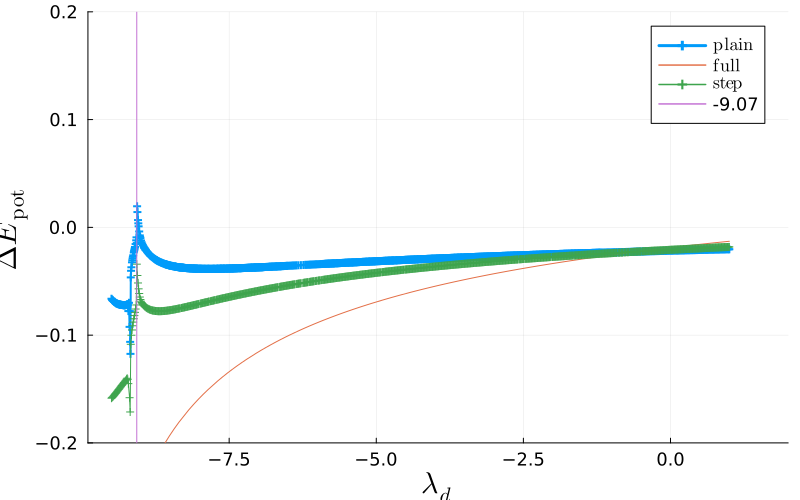

In [22]:
plot(xr_dm_01, fr_dm_01, size=(800,500), linewidth=2, ylims=(-.2,.2), xlims=(-9.9,2), ylabel=L"\Delta E_\mathrm{pot}", xlabel=L"\lambda_d", label=L"\mathrm{plain}",xtickfontsize=12,ytickfontsize=12,xguidefontsize=20,yguidefontsize=20,legendfontsize=12, markershape=:auto)
plot!(xr_dm_02, fr_dm_02, label=L"\mathrm{full}")
plot!(xr_dm_03, fr_dm_03, label=L"\mathrm{step}", markershape=:auto)
vline!([-9.07], label="-9.07")

In [25]:
λd_range = LinRange(-9.5, -5.0, 100)
se_ntc_list = []
se_ftc_list = []
se_etc_list = []
largest_ind_ntc = []
largest_ind_ftc = []
h = lDGAhelper;
for λd_test in λd_range
    rhs_c1,_ = LadderDGA.LambdaCorrection.λm_rhs(χm, χd, h; λd=λd_test)
    ωn2_tail = LadderDGA.ω2_tail(χm)
    λm_test =  LadderDGA.LambdaCorrection.λm_correction_val(χm, rhs_c1, h.kG, ωn2_tail)
    
    se_ntc = calc_Σ(χm, γm, χd, γd, λ₀, lDGAhelper; λm = λm_test, λd = λd_test, tc = :plain);
    se_ftc = calc_Σ(χm, γm, χd, γd, λ₀, lDGAhelper; λm = λm_test, λd = λd_test, tc = :full);
    #se_etc = calc_Σ(χm, γm, χd, γd, λ₀, lDGAhelper; λm = λm_test, λd = λd_test, tc = :exp_step);
    _,ind = findmax(imag(se_ntc[:,0]))
    push!(largest_ind_ntc, ind)
    _,ind = findmax(imag(se_ftc[:,0]))
    push!(largest_ind_ftc, ind)
    push!(se_ntc_list, imag(se_ntc[end-5,0]))
    push!(se_ftc_list, imag(se_ftc[end-5,0]))
    #push!(se_etc_list, imag(se_etc[1,0]))
end

In [24]:
lDGAhelper.kG.kGrid

21-element Vector{Tuple{Float64, Float64}}:
 (0.0, 0.0)
 (0.6283185307179586, 0.0)
 (0.6283185307179586, 0.6283185307179586)
 (1.2566370614359172, 0.0)
 (1.2566370614359172, 0.6283185307179586)
 (1.2566370614359172, 1.2566370614359172)
 (1.8849555921538759, 0.0)
 (1.8849555921538759, 0.6283185307179586)
 (1.8849555921538759, 1.2566370614359172)
 (1.8849555921538759, 1.8849555921538759)
 (2.5132741228718345, 0.0)
 (2.5132741228718345, 0.6283185307179586)
 (2.5132741228718345, 1.2566370614359172)
 (2.5132741228718345, 1.8849555921538759)
 (2.5132741228718345, 2.5132741228718345)
 (3.141592653589793, 0.0)
 (3.141592653589793, 0.6283185307179586)
 (3.141592653589793, 1.2566370614359172)
 (3.141592653589793, 1.8849555921538759)
 (3.141592653589793, 2.5132741228718345)
 (3.141592653589793, 3.141592653589793)

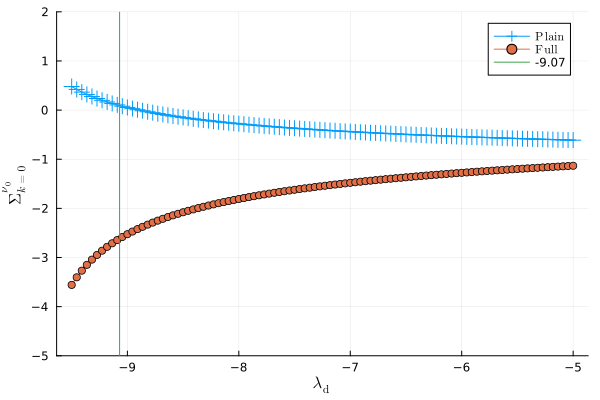

In [26]:
plot(λd_range, se_ntc_list, markershape=:auto, markersize=8, ylims=(-5,2), xlabel=L"\lambda_\mathrm{d}", ylabel=L"\Sigma^{\nu_0}_{k=0}", label=L"\mathrm{Plain}")
plot!(λd_range, se_ftc_list, markershape=:auto, xlabel=L"\lambda_\mathrm{d}", ylabel=L"\Sigma^{\nu_0}_{k=0}", label=L"\mathrm{Full}")
#plot!(λd_range, se_etc_list, markershape=:auto, xlabel=L"\lambda_\mathrm{d}", ylabel=L"\Sigma^{\nu_0}_{k=0}", label=L"\mathrm{Step}")
vline!([-9.07], label="-9.07")

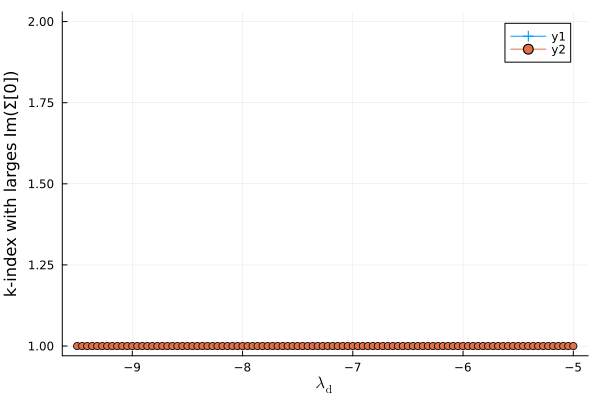

In [11]:
plot(λd_range,largest_ind_ntc, markershape=:auto,  xlabel=L"\lambda_\mathrm{d}", ylabel="k-index with larges Im(Σ[0])")
plot!(λd_range,largest_ind_ftc, markershape=:auto)

In [12]:
λd_range = LinRange(-10.5, 30.0, 100)
se_ntc_list = []
se_ftc_list = []
#se_etc_list = []
h = lDGAhelper;
for λd_test in λd_range
    rhs_c1,_ = LadderDGA.LambdaCorrection.λm_rhs(χm, χd, h; λd=λd_test)
    ωn2_tail = LadderDGA.ω2_tail(χm)
    λm_test =  LadderDGA.LambdaCorrection.λm_correction_val(χm, rhs_c1, h.kG, ωn2_tail)
    
    se_ntc = calc_Σ(χm, γm, χd, γd, λ₀, lDGAhelper; λm = λm_test, λd = λd_test, tc = :plain);
    se_ftc = calc_Σ(χm, γm, χd, γd, λ₀, lDGAhelper; λm = λm_test, λd = λd_test, tc = :full);
    #se_etc = calc_Σ(χm, γm, χd, γd, λ₀, lDGAhelper; λm = λm_test, λd = λd_test, tc = :exp_step);
    push!(se_ntc_list, imag(se_ntc[1,0]))
    push!(se_ftc_list, imag(se_ftc[1,0]))
    #push!(se_etc_list, imag(se_etc[1,0]))
end

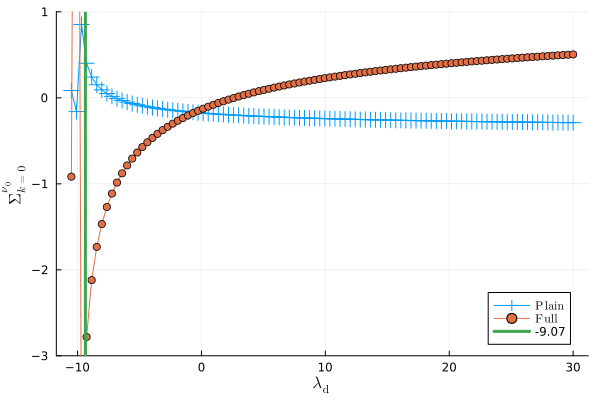

In [13]:
plot(λd_range, se_ntc_list, markershape=:auto, markersize=8, ylims=(-3,1), xlabel=L"\lambda_\mathrm{d}", ylabel=L"\Sigma^{\nu_0}_{k=0}", label=L"\mathrm{Plain}")
plot!(λd_range, se_ftc_list, markershape=:auto, xlabel=L"\lambda_\mathrm{d}", ylabel=L"\Sigma^{\nu_0}_{k=0}", label=L"\mathrm{Full}")
vline!([-9.37], label="-9.07", linewidth=3)

In [14]:
function get_λd_min(χm::χT, γm::γT, χd::χT, γd::γT, λ₀::Array{ComplexF64,3}, h::lDΓAHelper; 
                    λd_max::Float64=0.0, Δλ::Float64 = 1e-1, dΣ0_max::Float64=0.5, dΣ0_threshold::Float64=4.0)::Float64
    nh = ω0_index(χd)
    Nq = length(h.kG.kMult)
    λd_min0 = -minimum(1 ./ view(χd, :, nh)) + Δλ
    ωn2_tail = LadderDGA.ω2_tail(χm)
    Kνωq_pre::Vector{ComplexF64} = Vector{ComplexF64}(undef, Nq)
    Σ_ladder = OffsetArray(Matrix{ComplexF64}(undef, Nq, 1), 1:Nq, 0:0)
    
    λd_max = (λd_max - λd_min0) < 5 ? λd_max + 5 : λd_max
    λd_max_result = λd_max
    
    λd_grid = reverse(LinRange(λd_min0, λd_max, ceil(Int, (λd_max-λd_min0)/Δλ)))
    Σ0_λ_i::Float64 = NaN
    Σ0_λ_im::Float64 = NaN
    dΣ0_λ_last::Float64 = 0.0
    dΣ0_max::Float64 = 0.0
    
    for (i,λd_i) in enumerate(λd_grid)
        rhs_c1,_ = LadderDGA.LambdaCorrection.λm_rhs(χm, χd, h; λd=λd_i)
        λm_i =  LadderDGA.LambdaCorrection.λm_correction_val(χm, rhs_c1, h.kG, ωn2_tail)
        (λm_i != 0) && χ_λ!(χm, λm_i)
        (λd_i != 0) && χ_λ!(χd, λd_i)
        calc_Σ!(Σ_ladder, Kνωq_pre, χm, γm, χd, γd, λ₀, 0.0, h.gLoc_rfft, h.kG, h.mP, h.sP)
        (λm_i != 0) && reset!(χm)
        (λd_i != 0) && reset!(χd)
        Σ0_λ_i, ind = findmax(imag(Σ_ladder[:,0]))
        if i > 1
            dΣ0_λ_last = abs((Σ0_λ_im - Σ0_λ_i)/(λd_grid[i-1] - λd_grid[i]))
            Σ0_λ_im = Σ0_λ_i
        end
        if i > 2 && (Σ0_λ_i > 0 || dΣ0_λ_last > dΣ0_threshold)
            λd_max_result = λd_i
            break
        end
    end
    return λd_max_result
end

get_λd_min (generic function with 1 method)

In [15]:
using OffsetArrays, TimerOutputs
ω0_index = LadderDGA.ω0_index
calc_Σ! = LadderDGA.calc_Σ!
lmax = get_λd_min(χm, γm, χd, γd, λ₀, lDGAhelper)

-7.019112700527244

In [16]:
plot(xr[2:end], tt, markershape=:auto)
plot!(xr[1:end], t1, markershape=:auto, xlims=(-10,-5))
vline!([lmax])

LoadError: UndefVarError: `tt` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [17]:
a = randn(4,5)

4×5 Matrix{Float64}:
  0.93486     0.381302  -0.536438    0.740103   -0.199177
 -0.0923416   0.421475   0.0192972   0.0491905  -0.16722
 -1.66579    -2.00395   -1.87636    -0.351618    0.193036
 -0.165119    0.871286  -0.886615    0.0485523   0.139967

In [18]:
maximum(a)

0.9348598065375543

# Reasoning

 = Enhancement of charge fluctuations make system more metallic -> Sigma(nu_0) gets closer to 0.

 = tail correction term inverts behavior since the difference between magnetic channels now dominates low frequency behavior.

 = Step function and lambda-density cutoff seems to be correct way.